Decision Tree on regression datasets 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 

import nbformat 
from IPython import get_ipython

# from dtreeviz import dtreeviz, model  
# import graphviz 
# from IPython.display import Image 
# import pydotplus 

In [2]:
# %run "../Data_Preprocessing/data_preprocess_dtreg.ipynb" 

with open("../Data_Preprocessing/data_preprocess_dtreg.ipynb", "r", encoding="utf-8") as f:
    ntb = nbformat.read(f, as_version = 4) 

ipython = get_ipython() 

for cell in ntb.cells:
    if cell.cell_type == "code":
        print(cell.source) 

        if ("mov_reg_cleaned" in cell.source or "mov_reg" in cell.source):
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try:
    print("Movies Clean Data : ")
    print(mov_reg_cleaned.head())   # type: ignore 

except NameError as e:
    print(f"Variable not found: {e}")

import pandas as pd 
# import numpy as np 
# import seaborn as sb 
mov_reg = pd.read_csv('../Datasets/Movie_regression.csv', header=0)       # column tags are at zeroth index 
mov_reg 
mov_reg.shape 
mov_reg.describe() 
mov_reg.info() 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing_expense    506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_a

In [3]:
mov_reg_cleaned     # type: ignore 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,44800,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,41200,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,47800,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,44000,1,1,0,0


In [4]:
mov_reg_cleaned.corr()      # type: ignore 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
Marketing_expense,1.000000,0.406583,-0.420972,-0.219247,0.352734,0.380050,0.379813,0.380069,0.376462,-0.184985,-0.443457,0.025694,0.013518,0.059204,0.383298,-0.389582,-0.086805,0.066796,-0.016894,-0.037123
Production_expense,0.406583,1.000000,-0.763651,-0.391676,0.644779,0.706481,0.707956,0.707566,0.705819,-0.251565,-0.591657,0.015773,-0.000839,0.055810,0.707559,-0.484754,-0.115401,0.086958,-0.026590,-0.098976
Multiplex_coverage,-0.420972,-0.763651,1.000000,0.302188,-0.731470,-0.768589,-0.769724,-0.769157,-0.764873,0.145555,0.581386,0.035515,0.004882,-0.092104,-0.915495,0.429300,0.073903,-0.068554,0.046393,0.037772
Budget,-0.219247,-0.391676,0.302188,1.000000,-0.240265,-0.208464,-0.203981,-0.201907,-0.205397,0.232361,0.602536,0.040439,0.030674,-0.064694,-0.282796,0.696304,0.163774,-0.052579,-0.004195,0.046251
Movie_length,0.352734,0.644779,-0.731470,-0.240265,1.000000,0.746904,0.746493,0.747021,0.746707,-0.217830,-0.589318,-0.019820,0.009380,0.075198,0.673896,-0.377999,0.005101,0.092693,0.003452,-0.088609
Lead_ Actor_Rating,0.380050,0.706481,-0.768589,-0.208464,0.746904,1.000000,0.997905,0.997735,0.994073,-0.169978,-0.490267,0.038050,0.014463,0.036794,0.706331,-0.251355,-0.025208,0.044592,-0.035171,-0.030763
Lead_Actress_rating,0.379813,0.707956,-0.769724,-0.203981,0.746493,0.997905,1.000000,0.998097,0.994003,-0.165992,-0.487536,0.037975,0.010239,0.038005,0.708257,-0.249459,-0.020056,0.046974,-0.038965,-0.030566
Director_rating,0.380069,0.707566,-0.769157,-0.201907,0.747021,0.997735,0.998097,1.000000,0.994126,-0.166638,-0.486452,0.035881,0.010077,0.041470,0.709364,-0.246650,-0.020195,0.046268,-0.033510,-0.033634
Producer_rating,0.376462,0.705819,-0.764873,-0.205397,0.746707,0.994073,0.994003,0.994126,1.000000,-0.167003,-0.487911,0.028695,0.005850,0.032542,0.703518,-0.248200,-0.020022,0.051274,-0.031696,-0.033829
Critic_rating,-0.184985,-0.251565,0.145555,0.232361,-0.217830,-0.169978,-0.165992,-0.166638,-0.167003,1.000000,0.228641,-0.014762,-0.023655,-0.049797,-0.128769,0.341288,0.039235,-0.015253,0.057177,-0.037129


Variable split (X,y) : 

In [5]:
X = mov_reg_cleaned.loc[:, mov_reg_cleaned.columns != 'Collection']      # type: ignore 
X 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,1,1,0,0


In [6]:
print(type(X)) 

<class 'pandas.core.frame.DataFrame'>


In [7]:
X.shape 

(506, 19)

In [8]:
y = mov_reg_cleaned['Collection']      # type: ignore 
y 

0      48000
1      43200
2      69400
3      66800
4      72400
       ...  
501    44800
502    41200
503    47800
504    44000
505    38000
Name: Collection, Length: 506, dtype: int64

In [9]:
print(type(y)) 

<class 'pandas.core.series.Series'>


In [10]:
y.shape 

(506,)

Test - Train Split : 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

print(f" X_train size : {X_train.shape} \n X_test size : {X_test.shape} \n y_train size : {y_train.shape} \n y_test size : {y_test.shape}") 

print(f"X_train :\n{X_train}") 
print(f"X_test :\n{X_test}") 
print(f"y_train :\n{y_train}") 
print(f"y_test :\n{y_test}") 

 X_train size : (404, 19) 
 X_test size : (102, 19) 
 y_train size : (404,) 
 y_test size : (102,)
X_train :
     Marketing_expense  Production_expense  Multiplex_coverage     Budget  \
220            27.1618               67.40               0.493  38612.805   
71             23.1752               76.62               0.587  33113.355   
240            22.2658               64.86               0.572  38312.835   
6              21.7658               70.74               0.476  33396.660   
417           538.8120               91.20               0.321  29463.720   
..                 ...                 ...                 ...        ...   
323            25.6784               69.76               0.507  31707.940   
192            21.7328               61.88               0.563  39873.790   
117            23.0196               75.02               0.453  33446.655   
47             24.5854               68.82               0.552  33496.650   
172            22.7828               63.10  

In [12]:
X_train = pd.DataFrame(X_train, columns=list(X.columns))  
X_train 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,25.6784,69.76,0.507,31707.940,147.8,7.545,7.700,7.550,7.765,8.08,446743,131.40,302.960,25,501,1,1,0,0
192,21.7328,61.88,0.563,39873.790,99.8,6.620,6.830,6.700,6.895,7.96,515199,210.56,225.824,40,448,1,0,1,0
117,23.0196,75.02,0.453,33446.655,156.1,8.615,8.755,8.540,8.595,7.44,454755,189.68,303.072,28,609,0,0,0,0
47,24.5854,68.82,0.552,33496.650,159.0,7.085,7.180,7.125,7.230,7.42,374797,106.64,242.656,44,526,1,0,0,1


In [13]:
y_train = pd.Series(y_train) 
y_train 

220    53400
71     43400
240    54000
6      45800
417    20800
       ...  
323    37000
192    72800
117    38400
47     33200
172    46200
Name: Collection, Length: 404, dtype: int64

Training regression tree - 

In [14]:
regtree = tree.DecisionTreeRegressor(max_depth = 5)   # viable results uptil depth level 5 
regtree.fit(X_train, y_train) 

y_train_prd = regtree.predict(X_train) 
y_test_prd = regtree.predict(X_test)  


In [15]:
y_train_prd 

array([ 60168.        ,  43576.11940299,  60168.        ,  43576.11940299,
        26894.11764706,  35480.95238095,  43576.11940299,  43576.11940299,
        82600.        ,  24504.76190476,  35480.95238095,  39288.88888889,
        29910.34482759,  45120.        ,  17838.0952381 ,  43576.11940299,
        17838.0952381 ,  98000.        ,  56451.61290323,  26894.11764706,
        39288.88888889,  43576.11940299,  43576.11940299,  35480.95238095,
        68666.66666667,  39288.88888889,  43576.11940299,  68666.66666667,
        26894.11764706,  24504.76190476,  29910.34482759,  35480.95238095,
        17838.0952381 ,  68666.66666667,  43576.11940299,  29910.34482759,
        56451.61290323,  17838.0952381 ,  26894.11764706,  43576.11940299,
        60168.        ,  43576.11940299,  43576.11940299,  35480.95238095,
        68666.66666667,  68666.66666667,  24504.76190476,  17838.0952381 ,
        46875.        ,  43576.11940299,  29910.34482759,  43576.11940299,
        35480.95238095,  

In [16]:
y_test_prd 

array([ 43576.11940299, 100000.        ,  43576.11940299,  26894.11764706,
        43576.11940299,  43576.11940299,  43576.11940299,  43576.11940299,
        43576.11940299,  43576.11940299,  17838.0952381 ,  26894.11764706,
        26894.11764706,  26894.11764706,  88920.        ,  60168.        ,
        43576.11940299,  68666.66666667,  56451.61290323,  43576.11940299,
        43576.11940299,  43576.11940299,  43576.11940299,  43576.11940299,
        43576.11940299,  43576.11940299,  43576.11940299,  35480.95238095,
        98000.        ,  35480.95238095,  26894.11764706,  26894.11764706,
        43576.11940299,  43576.11940299,  43576.11940299,  35480.95238095,
        17838.0952381 , 100000.        ,  24504.76190476,  24504.76190476,
        43576.11940299,  43576.11940299,  43576.11940299,  24504.76190476,
        43576.11940299,  43576.11940299,  39288.88888889,  35480.95238095,
        29910.34482759,  56451.61290323,  35480.95238095,  39288.88888889,
        43576.11940299,  

Model performance 

In [17]:
mse_trn = mean_squared_error(y_train, y_train_prd) 
print(f"Train mean Squared Error : {mse_trn}") 

mse_tst = mean_squared_error(y_test, y_test_prd) 
print(f"Test mean Squared Error : {mse_tst}") 

Train mean Squared Error : 26230267.51198066
Test mean Squared Error : 125130766.43977945


In [18]:
r2_trn = r2_score(y_train, y_train_prd) 
print(f"Train r^2 Score : {r2_trn}") 

r2_tst = r2_score(y_test, y_test_prd) 
print(f"Test r^2 Score : {r2_tst}") 

Train r^2 Score : 0.922900031419891
Test r^2 Score : 0.611304157316575


Plotting decision Tree - 

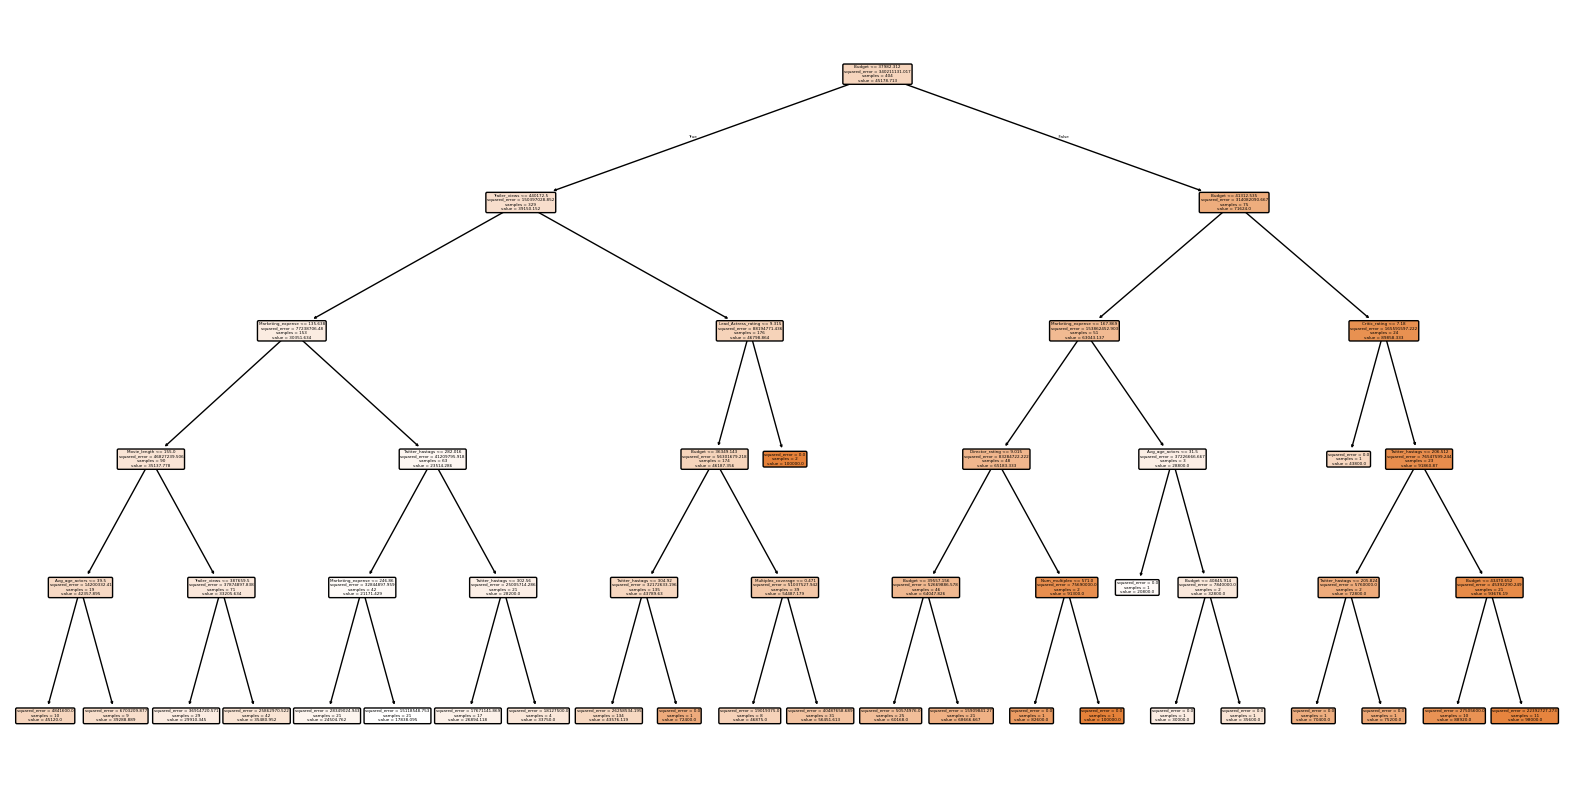

In [19]:
plt.figure(figsize=(20, 10)) 
plot_tree(regtree, filled=True, feature_names=X_train.columns, rounded=True) 
plt.show() 


In [20]:
# pip install graphviz pydotplus dtreeviz 
'''
# viz = dtreeviz(regtree, X_train, y_train, target_name="Collection", feature_names=list(X_train.columns), title="Regression Decision Tree for movie collection") 
viz = model(regtree, X_train, y_train, target_name="Collection", feature_names=list(X_train.columns)) 
viz.view() 
'''  

'\n# viz = dtreeviz(regtree, X_train, y_train, target_name="Collection", feature_names=list(X_train.columns), title="Regression Decision Tree for movie collection") \nviz = model(regtree, X_train, y_train, target_name="Collection", feature_names=list(X_train.columns)) \nviz.view() \n'

In [21]:
'''
dot_data = tree.export_graphviz(regtree, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png()) 
# ''' 


'\ndot_data = tree.export_graphviz(regtree, out_file=None) \ngraph = pydotplus.graph_from_dot_data(dot_data) \nImage(graph.create_png()) \n# '

Controlling Tree Growth - 

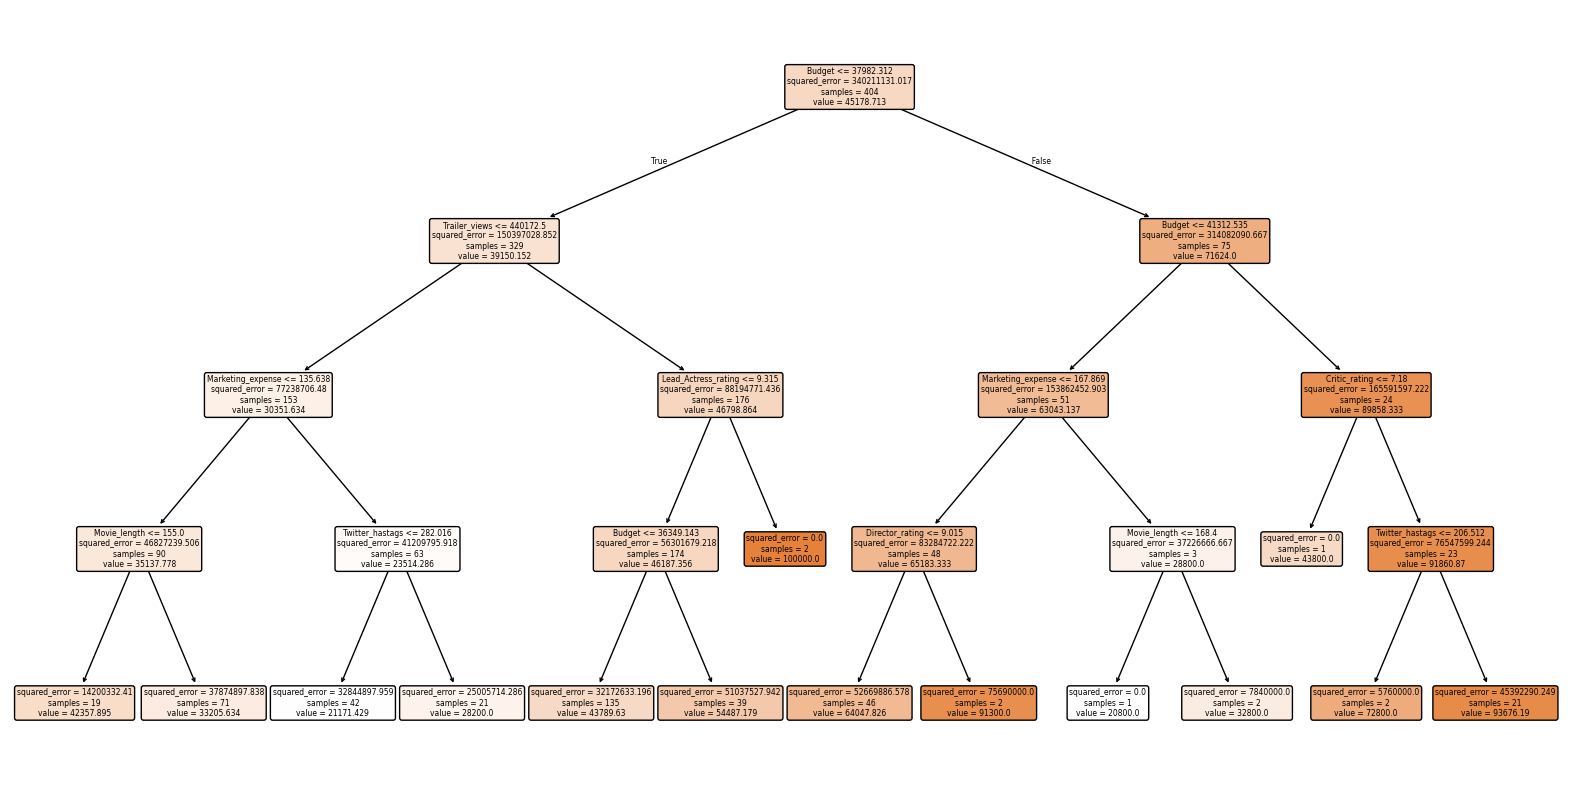

In [22]:
# Controlling levels in tree 

regtree1 = DecisionTreeRegressor(max_depth = 4) 
regtree1.fit(X_train, y_train) 

plt.figure(figsize=(20, 10)) 
plot_tree(regtree1, filled=True, feature_names=X_train.columns, rounded=True) 
plt.show() 

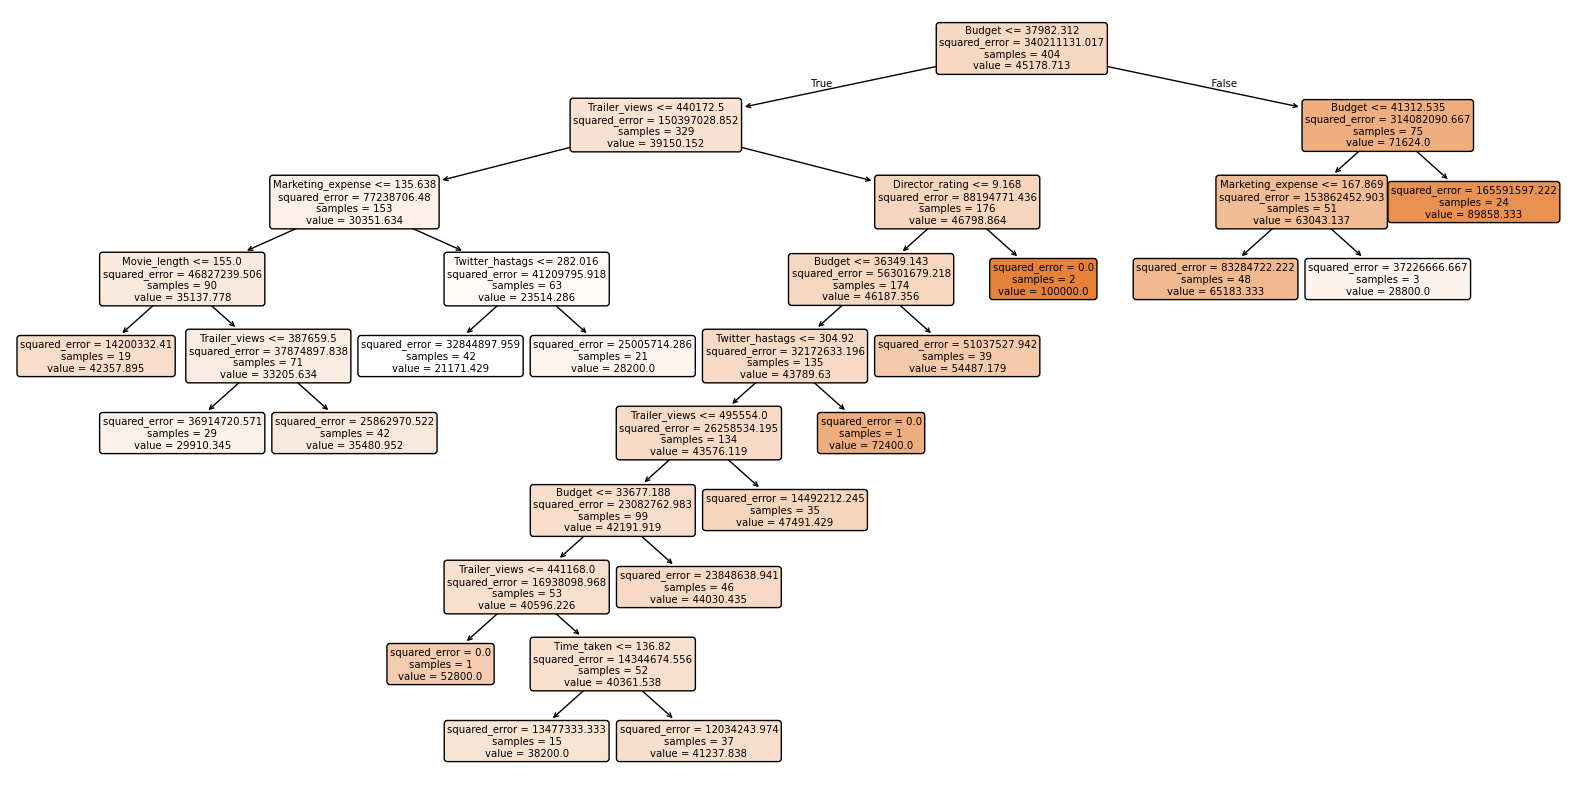

In [23]:
# Minimum observations at internal node 

# regtree2 = DecisionTreeRegressor(min_samples_split = 40) 
regtree2 = DecisionTreeRegressor(min_samples_split = 50) 
regtree2.fit(X_train, y_train) 

plt.figure(figsize=(20, 10)) 
plot_tree(regtree2, filled=True, feature_names=X_train.columns, rounded=True) 
plt.show() 

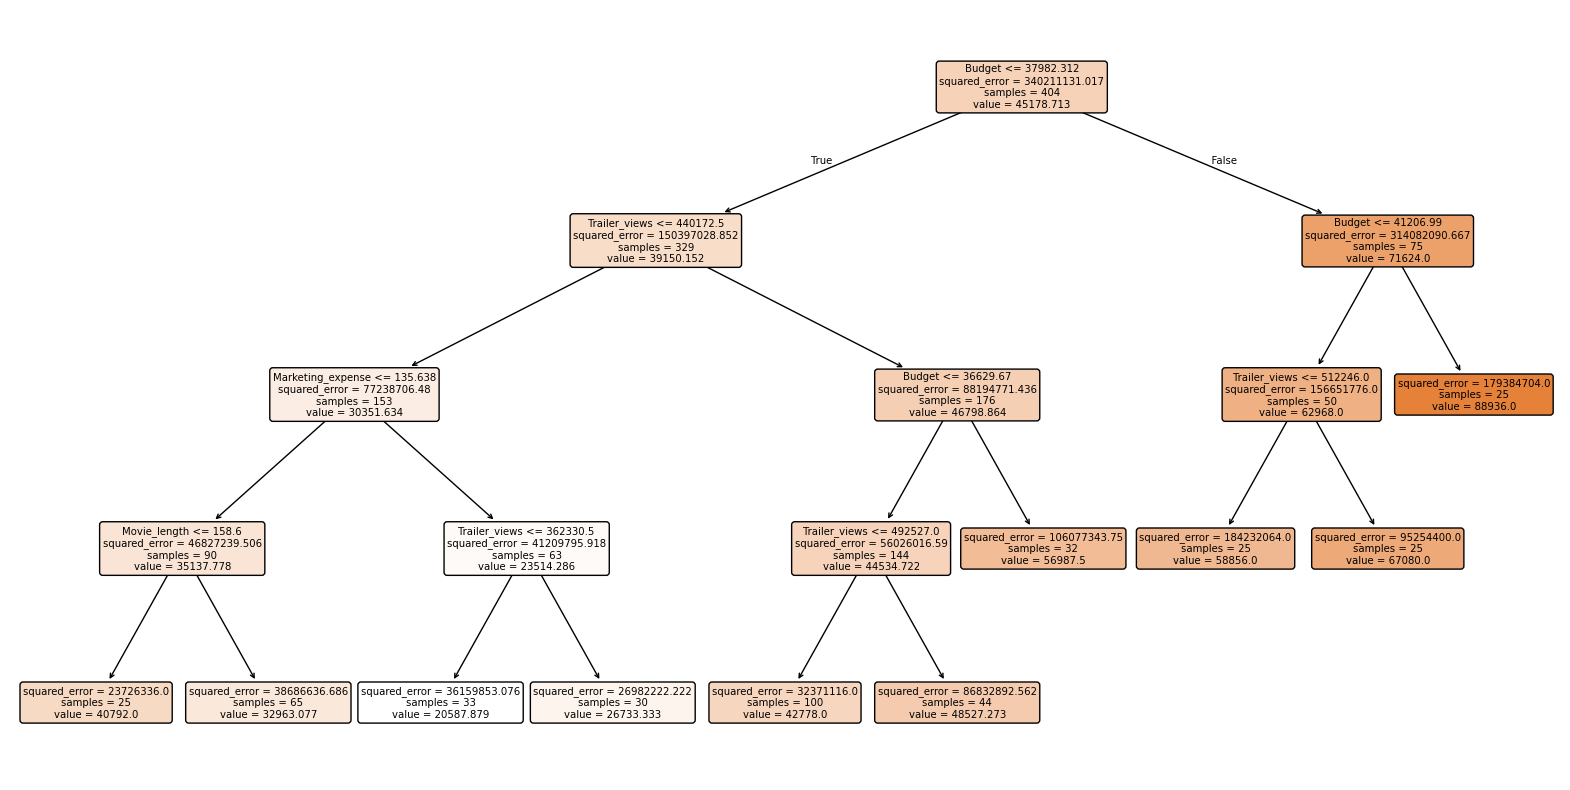

In [24]:
# Minimum observations at leaf node 

# regtree3 = DecisionTreeRegressor(min_samples_leaf = 30)  
regtree3 = DecisionTreeRegressor(min_samples_leaf = 25, max_depth = 4)   
regtree3.fit(X_train, y_train) 

plt.figure(figsize=(20, 10)) 
plot_tree(regtree3, filled=True, feature_names=X_train.columns, rounded=True) 
plt.show() 